## File tree

```bash
KEMDy19
├── ECG
├── EDA
├── TEMP
├── annotation
└── wav
```

```bash
KEMDy19/ECG
├── Session01
│   └── Original
├── Session02
│   └── Original
...
└── Session20
    └── Original
```

```bash
KEMDy19/EDA
├── Session01
│   └── Original
├── Session02
│   └── Original
...
└── Session20
    └── Original
```

```bash
KEMDy19/TEMP
├── Session01
│   └── Original
├── Session02
│   └── Original
...
└── Session20
    └── Original
```

```bash
KEMDy19/wav
├── Session01
│   ├── Sess01_impro01
│   ├── Sess01_impro02
│   │   └── converted
│   ├── Sess01_impro03
│   │   └── converted
│   ├── Sess01_impro04
│   │   └── converted
│   ├── Sess01_script01
│   │   └── converted
│   ├── Sess01_script02
│   │   └── converted
│   ├── Sess01_script03
│   │   └── converted
│   ├── Sess01_script04
│   │   └── converted
│   ├── Sess01_script05
│   │   └── converted
│   └── Sess01_script06
│       └── converted
├── Session02
...
└── Session20
```

In [1]:
import os
from glob import glob
import yaml

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
pd.options.display.max_columns = 100

# load yaml
with open("config.yaml") as f:
    cfg = yaml.load(f, Loader=yaml.FullLoader)

cfg

{'BASE_PATH': '../data/KEMDy19', 'ANN_PATH': '../data/KEMDy19/annotation/'}

## PATH CHECK 



In [4]:
for i in range(1, 50):
    try:
        with open(
            "./data/KEMDy19/wav/Session01/Sess01_script01/Sess01_script01_M{:03d}.txt".format(i),
            mode="r",
        ) as f:
            print("M:", f.readlines())

        with open(
            "./data/KEMDy19/wav/Session01/Sess01_script01/Sess01_script01_F{:03d}.txt".format(i),
            mode="r",
        ) as f:
            print("F:", f.readlines())
    except Exception as e:
        pass

M: ['어 저 지그 지금 사람 친 거야? 지금 사람 친 거 맞지? 그치?\n']
F: ['b/ 몰라. o/ b/ 아 몰라 어떡해. o/\n']
M: ['아이 씨 그러니까 나 말렸어야지. 술 먹어서 운전 안 한다고 했잖아. b/\n']
F: ['n/ 지섭씨. 일단 112에 신고하자.\n']
M: ['아이 씨 괜히 운전해서 이씨.\n']
F: ['아 지금 생각할게 할게 뭐가 있어. b/ 지섭씨는 여기있어. 일단 내가 가서 보고 o/ 올테니까.\n']
M: ['잠깐만. 잠깐만 기다려봐. 이 그러니 그러니까 그 좀 생각좀 o/ 해보자고 그. o/\n']
F: ['지섭씨.\n']
M: ['o/ u/ 죽었으면 u/ 어떡하지? 나 수 술도 n/ 술도 마셨는데 u/ 신고를 해야되나? 아이 그니까 이게 u/ 나중에 더 일이 u/ 커질건데 그면 어떡하지. 그니까 내가 그니까 이거. b/\n']
F: ['아 아니 그게 말야. 아무것도 도로에 아무것도 없어.\n']
M: ['이 야밤에 돌아다니다가 왜 내 차에 치이고 난리야 이씨. b/ \n']
F: ['아 그래 근데 지금 없어. 죽었는지 살았는지 우리가 친 사람이 없단 말야.\n']
M: ['아이 깜짝이야. o/ b/ u/ 어 어떻게 됐어? o/ 죽었어?\n']
F: ['o/ N/ 지섭씨 사람하고 고라니를 구분 못 할 정돈 (아니잖아)\n']
M: ['어? 아무것도 없다니? 그게 말이 돼? 아 틀림없이 사람을 쳤잖아. 너도 봤잖아. \n']
F: ['하 그러니까. o/ b/\n']
M: ['u/ 그 그럼 뭐지? 어? 뭐 뭐.\n']
F: ['지금 무슨 소릴 하는 거야. 지금 어딘가에 있을 거야. 우리가 사람을 쳤는데 당연히 찾아서 병원에 데려가야지. b/\n']
M: ['o/ 아 l/ 아 그래 맞아. 고라니였나보다. 그치? 고라니였어. l/ 그니까 너랑 나랑 술을 마셔서 고라니를 이 사람으로 착각을 한 거야. 그지?\n']
F: ['지섭씨.\n']
M: ['(아니잖아+그럼) 뭐야. 그럼 어떻게 된 거야. n/ 사람은 쳤는데 그 

In [6]:
sorted(os.listdir("./data/KEMDy19/EDA/Session01/Original"))

['Sess01F.csv', 'Sess01M.csv']

## CSV 

In [3]:
def generate_total(ANN_PATH):
    """total label, valence, arousal까지 불러오기"""
    M_ANN_PATH_fmt = "Session*_M_*"
    F_ANN_PATH_fmt = "Session*_F_*"

    except_dialogue = ["Sess01_impro03", "Sess01_impro04"]  # 나중에 테스트 빼기 쉽게...

    df_columns = [
        "Numb",
        "Wav_start",
        "Wav_end",
        "ECG_start",
        "ECG_end",
        "E4-EDA_start",
        "E4-EDA_end",
        "E4-TEMP_start",
        "E4-TEMP_end",
        "Segment ID",
        "Total Evaluation",
        "Arousal",
        "Valence",
        "dialogue_main",
    ]

    df = pd.DataFrame()
    for m_ann, f_ann in zip(
        sorted(glob(ANN_PATH + M_ANN_PATH_fmt)), sorted(glob(ANN_PATH + F_ANN_PATH_fmt))
    ):
        m_df = pd.read_csv(m_ann).iloc[:, :13].dropna()
        f_df = pd.read_csv(f_ann).iloc[:, :13].dropna()

        # Sess01_impro03, Sess01_impro04의 TEMP와 E4-EDA값이 결측
        m_df["dialogue_main"] = list(
            map(lambda x: "_".join(x.split("_")), m_df["Segment ID"])
        )
        f_df["dialogue_main"] = list(
            map(lambda x: "_".join(x.split("_")), f_df["Segment ID"])
        )
        m_df = m_df[~m_df["dialogue_main"].isin(except_dialogue)]
        f_df = f_df[~f_df["dialogue_main"].isin(except_dialogue)]

        # 각 발화의 성별에 대한 감정만 추출
        m_df = m_df[m_df["Segment ID"].str.contains("M")]
        f_df = f_df[f_df["Segment ID"].str.contains("F")]

        tmp = pd.concat([m_df, f_df], axis=0).sort_values("Numb")
        df = df.append(tmp, ignore_index=True)

    df.columns = df_columns
    return df


ANN_PATH = cfg["ANN_PATH"]
total_df = generate_total(ANN_PATH)
total_df.head()

,Numb,Wav_start,Wav_end,ECG_start,ECG_end,E4-EDA_start,E4-EDA_end,E4-TEMP_start,E4-TEMP_end,Segment ID,Total Evaluation,Arousal,Valence,dialogue_main
0,1.0,7.152,15.476,-0.03253542,0.05061065,4.408951,4.651463,34.66,34.59,Sess01_script01_M001,surprise,1.7,4,Sess01_script01_M001
1,2.0,15.476,19.786,-0.02892037,-0.2566683,0.145914,0.143354,30.69,30.71,Sess01_script01_F001,fear,1.5,3.6,Sess01_script01_F001
2,3.0,19.786,26.493,-0.4735711,-0.2928188,4.478828,4.746299,34.61,34.55,Sess01_script01_M002,angry,1.3,4.3,Sess01_script01_M002
3,4.0,26.493,28.943,-0.2928188,2.653444,4.746299,4.579696,34.55,34.53,Sess01_script01_M003,angry,1.5,3.8,Sess01_script01_M003
4,5.0,28.943,32.167,0.155447,0.02169028,0.134394,0.125435,30.69,30.71,Sess01_script01_F002,fear,1.6,3.7,Sess01_script01_F002


In [7]:
total_df["Total Evaluation"].value_counts()

neutral                                3793
angry                                  1839
happy                                  1394
surprise                                985
sad                                     769
disgust                                 395
fear                                    379
neutral;happy                           158
neutral;angry                           102
neutral;surprise                         65
neutral;disgust                          63
neutral;sad                              52
angry;disgust                            45
happy;surprise                           28
fear;surprise                            28
angry;surprise                           15
sad;angry                                14
neutral;fear                             12
angry;fear                               10
sad;surprise                              6
neutral;angry;disgust                     5
happy;angry                               4
fear;disgust                    

## EDA signal 


In [4]:
from tqdm.auto import tqdm


def eda_preprocess(file_path):
    """ on_bad_line이 있어서 (column=4 or  3으로 일정하지 않아) 4줄로 통일 하는 함수 """
    columns = ["EDA_value", "a", "b", "Segment ID"]

    with open(file_path, "r") as f:
        lines = f.readlines()

    new_lines = []
    for line in tqdm(lines):
        line = line.rstrip()
        if len(line.split(",")) <= 3:
            line += ",None"  # 4줄로 만들어주기 .
        new_lines.append(line.split(","))

    return pd.DataFrame(new_lines, columns=columns).replace("None", np.nan).dropna()

In [5]:
eda_sample_path = "../data/KEMDy19/EDA/Session20/Original/Sess20M.csv"

eda_df = eda_preprocess(eda_sample_path)
eda_df.head()

  0%|          | 0/23280 [00:00<?, ?it/s]

,EDA_value,a,b,Segment ID
1648,0.204011,412.25,16:50:49.250,Sess20_script01_M001
1649,0.197604,412.5,16:50:49.500,Sess20_script01_M001
1650,0.193760,412.75,16:50:49.750,Sess20_script01_M001
1651,0.193760,413.0,16:50:50.000,Sess20_script01_M001
1652,0.189915,413.25,16:50:50.250,Sess20_script01_M001


In [13]:
merge_df = pd.merge(
    eda_df,
    total_df[["Total Evaluation", "Segment ID", "Arousal", "Valence"]],
    how="inner",
)
merge_df

,EDA_value,a,b,Segment ID,Total Evaluation,Arousal,Valence
0,0.204011,412.25,16:50:49.250,Sess20_script01_M001,happy,4.4,3.7
1,0.197604,412.5,16:50:49.500,Sess20_script01_M001,happy,4.4,3.7
2,0.193760,412.75,16:50:49.750,Sess20_script01_M001,happy,4.4,3.7
3,0.193760,413.0,16:50:50.000,Sess20_script01_M001,happy,4.4,3.7
4,0.189915,413.25,16:50:50.250,Sess20_script01_M001,happy,4.4,3.7
...,...,...,...,...,...,...,...
11724,0.684580,2679.75,18:33:31.750,Sess20_impro04_M020,happy,4.2,4
11725,0.679454,2680.0,18:33:32.000,Sess20_impro04_M020,happy,4.2,4
11726,0.667921,2680.25,18:33:32.250,Sess20_impro04_M020,happy,4.2,4
11727,0.656387,2680.5,18:33:32.500,Sess20_impro04_M020,happy,4.2,4


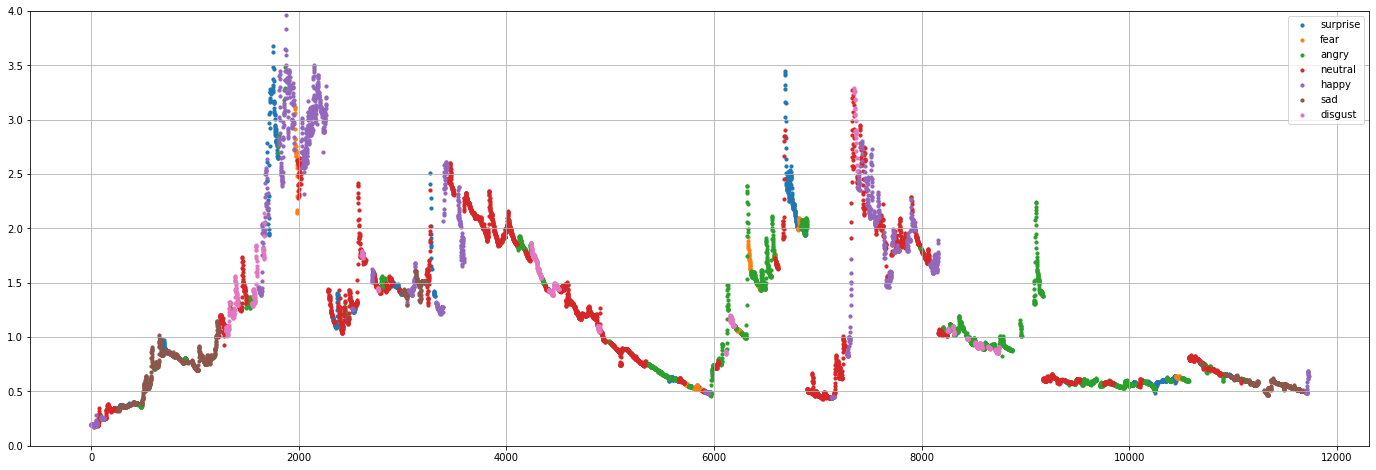

In [14]:
emotion = {
    "surprise": 1,
    "fear": 2,
    "angry": 3,
    "neutral": 4,
    "happy": 5,
    "sad": 6,
    "disgust": 7,
}.keys()


plt.figure(figsize=(24, 8))

for idx, i in enumerate(list(emotion)):
    plt.scatter(
        merge_df[merge_df["Total Evaluation"] == i].index,
        merge_df[merge_df["Total Evaluation"] == i]["EDA_value"].astype(float),
        s=10,
        color=f"C{idx}",
    )
    # (ax=ax,title=i)
# plt.title(i)
plt.legend(emotion)
plt.ylim(0, 4)
plt.grid(True)

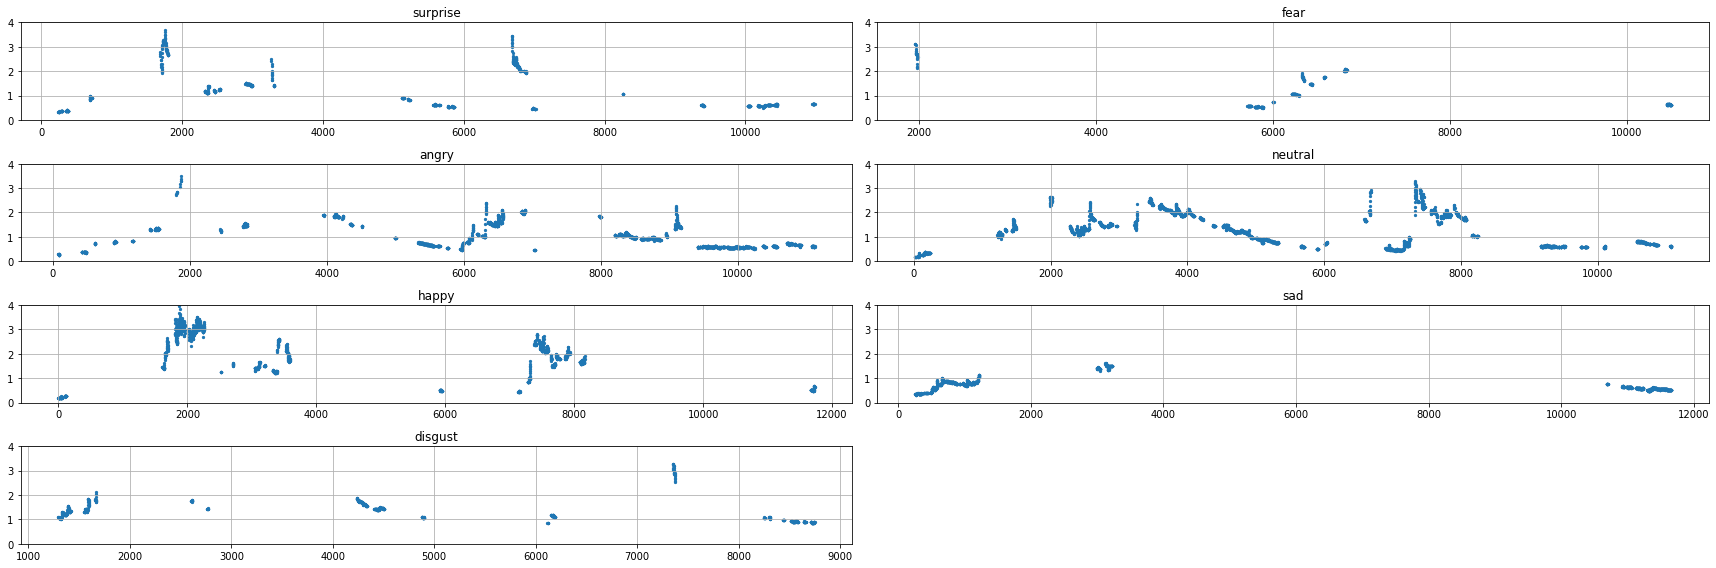

In [15]:
plt.figure(figsize=(24, 8))

for idx, i in enumerate(list(emotion)):
    ax = plt.subplot(4, 2, idx + 1)
    # mege_df[mege_df['Total Evaluation']==i]['EDA_value'].astype(float).plot.scatter()
    ax.scatter(
        merge_df[merge_df["Total Evaluation"] == i].index,
        merge_df[merge_df["Total Evaluation"] == i]["EDA_value"].astype(float),
        s=5,
    )
    # (ax=ax,title=i)
    ax.set_title(i)
    ax.set_ylim(0, 4)
    ax.grid(True)
plt.tight_layout()